In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from collections import Counter
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.metrics import r2_score , f1_score , accuracy_score , classification_report , mean_squared_error

In [3]:
data = pd.read_excel('H:\DATA\MY\practice\Practice-20\Pistachio_16_Features_Dataset.xlsx')
data.head()
print(data.shape)

(2148, 17)


In [4]:
for column in data.columns: 
  if data[column].dtype != object:
    Q1 = data[column].quantile(0.15)
    Q3 = data[column].quantile(0.85)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    
    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
print(data.shape)

(2062, 17)


In [5]:
data.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4,Class
0,63391,1568.405,390.3396,236.7461,0.7951,284.0984,0.8665,73160,0.6394,1.6488,0.3238,0.7278,0.0062,0.0037,0.5297,0.8734,Kirmizi_Pistachio
1,68358,1942.187,410.8594,234.7525,0.8207,295.0188,0.8765,77991,0.6772,1.7502,0.2277,0.7181,0.0060,0.0034,0.5156,0.9024,Kirmizi_Pistachio
2,73589,1246.538,452.3630,220.5547,0.8731,306.0987,0.9172,80234,0.7127,2.0510,0.5951,0.6767,0.0061,0.0030,0.4579,0.9391,Kirmizi_Pistachio
3,71106,1445.261,429.5291,216.0765,0.8643,300.8903,0.9589,74153,0.7028,1.9879,0.4278,0.7005,0.0060,0.0030,0.4907,0.9755,Kirmizi_Pistachio
4,80087,1251.524,469.3783,220.9344,0.8823,319.3273,0.9657,82929,0.7459,2.1245,0.6425,0.6803,0.0059,0.0028,0.4628,0.9833,Kirmizi_Pistachio


C:\Users\mouncef\AppData\Local\Temp\ipykernel_9980\3446562162.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix  = data.corr()


<Axes: >

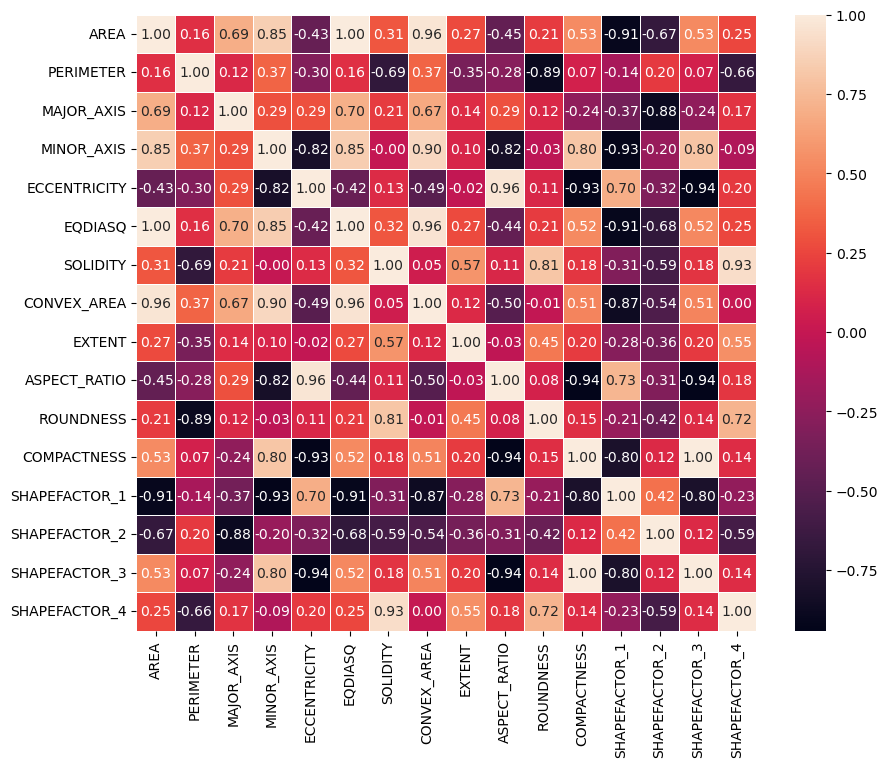

In [6]:
corr_matrix  = data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", linewidths=.5)

In [12]:
from sklearn.preprocessing import LabelEncoder

encode = LabelEncoder()
data['Class'] = encode.fit_transform(data['Class'])
# here we are evaluating the model 

X = data.drop('AREA',axis = 1)
Y = data['AREA']

x_train , x_test , y_train , y_test = train_test_split(X, Y , test_size=0.2 , random_state=42)

model  = LinearRegression()
model.fit(x_train , y_train)

y_pred = model.predict(x_test)

r2 = r2_score(y_pred , y_test)
mse = mean_squared_error(y_pred , y_test)

print('the R2 score : ',r2)
print('the Mean Squared Error : ',mse)



the R2 score :  0.9998115598236879
the Mean Squared Error :  29471.618671906548


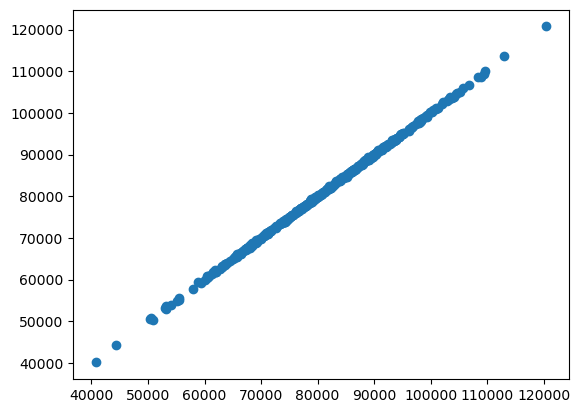

In [13]:
plt.scatter(y_pred, y_test)

In [8]:
from sklearn.model_selection import cross_val_score

score  = cross_val_score(model , X , Y , cv=5)

print('the Cross Validation Score : ',score)
print('the Mean Cross Validation Score : ',score.mean())

the Cross Validation Score :  [0.99970989 0.99965957 0.99967433 0.99958115 0.99961824]
the Mean Cross Validation Score :  0.999648633817699


In [9]:
data.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4,Class
0,63391,1568.405,390.3396,236.7461,0.7951,284.0984,0.8665,73160,0.6394,1.6488,0.3238,0.7278,0.0062,0.0037,0.5297,0.8734,0
1,68358,1942.187,410.8594,234.7525,0.8207,295.0188,0.8765,77991,0.6772,1.7502,0.2277,0.7181,0.0060,0.0034,0.5156,0.9024,0
2,73589,1246.538,452.3630,220.5547,0.8731,306.0987,0.9172,80234,0.7127,2.0510,0.5951,0.6767,0.0061,0.0030,0.4579,0.9391,0
3,71106,1445.261,429.5291,216.0765,0.8643,300.8903,0.9589,74153,0.7028,1.9879,0.4278,0.7005,0.0060,0.0030,0.4907,0.9755,0
4,80087,1251.524,469.3783,220.9344,0.8823,319.3273,0.9657,82929,0.7459,2.1245,0.6425,0.6803,0.0059,0.0028,0.4628,0.9833,0


In [14]:
from sklearn.ensemble import RandomForestClassifier
X = data.drop('Class',axis = 1)
Y = data['Class']

x_train , x_test , y_train , y_test = train_test_split(X , Y , test_size=0.2 , random_state= 42)

model = RandomForestClassifier()
model.fit(x_train , y_train)

y_pred = model.predict(x_test)

accuracy = accuracy_score(y_pred , y_test)
repport = classification_report(y_pred , y_test)

print('the acccuracy score : ', accuracy)
print('the classification repport : ', repport)

the acccuracy score :  0.8813559322033898
the classification repport :                precision    recall  f1-score   support

           0       0.90      0.89      0.90       234
           1       0.86      0.87      0.86       179

    accuracy                           0.88       413
   macro avg       0.88      0.88      0.88       413
weighted avg       0.88      0.88      0.88       413

